<a href="https://colab.research.google.com/github/MustiCankan/SpiriteAI/blob/main/RealistixcVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realistic Vision

Downloading weights

In [1]:
!pip install diffusers transformers accelerate safetensors

In [ ]:
#!/usr/bin/env python

# Run this before you deploy it on replicate
import os
import sys
import torch
from diffusers import AutoencoderKL, StableDiffusionImg2ImgPipeline

# append project directory to path so predict.py can be imported
sys.path.append('.')

MODEL_NAME = "SG161222/Realistic_Vision_V5.0_noVAE"
MODEL_CACHE = "cache"
VAE_CACHE = "vae-cache"

# Make cache folders
if not os.path.exists(MODEL_CACHE):
    os.makedirs(MODEL_CACHE)

if not os.path.exists(VAE_CACHE):
    os.makedirs(VAE_CACHE)

url = "https://huggingface.co/stabilityai/sd-vae-ft-mse-original/blob/main/vae-ft-mse-840000-ema-pruned.safetensors"
vae = AutoencoderKL.from_single_file(
    url,
    cache_dir=VAE_CACHE
)


pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16,
)
pipe.save_pretrained(MODEL_CACHE, safe_serialization=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vae-ft-mse-840000-ema-pruned.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
!pip install cog

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.6/452.6 kB 40.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.3.0
    Uninstalling attrs-24.3.0:
      Successfully uninstalled attrs-24.3.0


Predict

In [41]:
import os
import math
import torch
from PIL import Image
from diffusers import AutoencoderKL, StableDiffusionImg2ImgPipeline
import tempfile

MODEL_NAME = "SG161222/Realistic_Vision_V6.0_noVAE"
MODEL_CACHE = "/content/vae-cache"
VAE_CACHE = "/content/vae-cache"


"""Load the model into memory to make running multiple predictions efficient"""
vae = AutoencoderKL.from_single_file(
            "https://huggingface.co/stabilityai/sd-vae-ft-mse-original/blob/main/vae-ft-mse-840000-ema-pruned.safetensors",
            cache_dir=VAE_CACHE
)

MODEL_NAME = "SG161222/Realistic_Vision_V6.0_noVAE"
MODEL_CACHE = "cache"
VAE_CACHE = "vae-cache"

# Make cache folders
if not os.path.exists(MODEL_CACHE):
    os.makedirs(MODEL_CACHE)

if not os.path.exists(VAE_CACHE):
    os.makedirs(VAE_CACHE)

url = "https://huggingface.co/stabilityai/sd-vae-ft-mse-original/blob/main/vae-ft-mse-840000-ema-pruned.safetensors"
vae = AutoencoderKL.from_single_file(
    url,
    cache_dir=VAE_CACHE
)


pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16,
)
pipe.save_pretrained(MODEL_CACHE, safe_serialization=True)
pipe.to("cuda")

def scale_down_image(image_path, max_size):
      #Open the Image
      image = Image.open(image_path)
      #Get the Original width and height
      width, height = image.size
      # Calculate the scaling factor to fit the image within the max_size
      scaling_factor = min(max_size/width, max_size/height)
      # Calaculate the new width and height
      new_width = int(width * scaling_factor)
      new_height = int(height * scaling_factor)
      #resize the image
      resized_image = image.resize((new_width, new_height))
      cropped_image = crop_center(resized_image)
      return cropped_image

def crop_center(pil_img):
      img_width, img_height = pil_img.size
      crop_width = base(img_width)
      crop_height = base(img_height)
      return pil_img.crop(
                (
                    (img_width - crop_width) // 2,
                    (img_height - crop_height) // 2,
                    (img_width + crop_width) // 2,
                    (img_height + crop_height) // 2)
                )

def base(x):
    return int(8 * math.floor(int(x)/8))

def predict(image,seed,guidance_scale,num_inference_steps,prompt: str =  "A latin girl in a red jacket, snowy, in the style of hyper-realistic portraiture, caninecore, mountainous vistas, timeless beauty",
            negative_prompt: str = "disfigured, kitsch, ugly, oversaturated, greain, low-res, deformed, blurry, naked, corgi"):
        if (seed == 0) or (seed == None):
            seed = int.from_bytes(os.urandom(2), byteorder='big')
        generator = torch.Generator('cuda').manual_seed(seed)
        print("Using seed:", seed)

        r_image = scale_down_image(image, 1024)
        image = pipe(
            prompt=prompt,
            image=r_image,
            strength=1,
            guidance_scale=guidance_scale,
            negative_prompt=negative_prompt,
            num_inference_steps=num_inference_steps,
            generator=generator,
        ).images[0]
        #Scale image

        image.save("image.png")
        image.show()
        return image




Couldn't connect to the Hub: 401 Client Error. (Request ID: Root=1-678d0efa-48d3de67709c4c573bcca8db;7885cc0f-494a-4aca-99fd-738a5c92b374)

Repository Not Found for url: https://huggingface.co/api/models/SG161222/Realistic_Vision_V6.0_noVAE.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password..
Will try to load from local cache.


OSError: Cannot load model SG161222/Realistic_Vision_V6.0_noVAE: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.

Showing the Image

In [3]:
from matplotlib import pyplot as plt

Using seed: 243524534949


  0%|          | 0/40 [00:00<?, ?it/s]

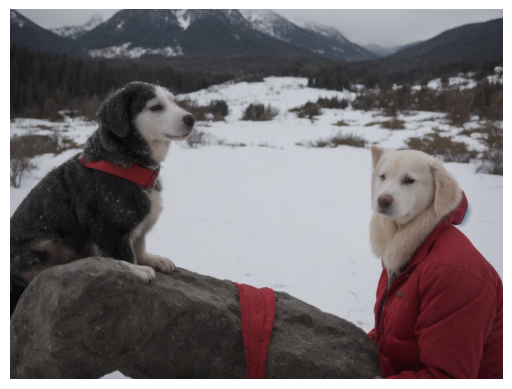

In [42]:
image = predict("/content/demo.png",243524534949,2,num_inference_steps=40)
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.show()

cog.yaml  demo.jpg  output.png	predict.py  README.md  script


/bin/bash: line 1: cog: command not found
